# Survey Results Analysis! 

This notebook shows you how can use the tools we've learned over this summer to analyze data! 

Done with the permission of Austen's students. 

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
midterm_survey = Table.read_table("form_responses_midterm.csv").drop(6,9)
midterm_survey

Timestamp,Are lab assignments too short or too long?,Should I present more material/review during the labs?,How helpful am I in understanding material during lab/discussion?,How much interaction have I had with you?,Please rate my overall teaching effectiveness,How helpful are office hours?,Are you receiving enough help and support to succeed?
2017/07/19 3:18:50 PM MDT,3,2,4,4,4,5,5
2017/07/19 3:18:57 PM MDT,4,3,5,5,5,5,4
2017/07/19 3:19:08 PM MDT,4,2,5,5,5,4,5
2017/07/19 3:19:15 PM MDT,4,3,5,4,4,3,3
2017/07/19 3:19:22 PM MDT,5,5,3,4,4,4,4
2017/07/19 3:19:37 PM MDT,4,3,4,4,5,5,4
2017/07/19 3:19:45 PM MDT,4,2,3,4,4,4,4
2017/07/19 3:19:53 PM MDT,3,1,5,5,5,nan,5
2017/07/19 3:19:56 PM MDT,5,3,5,2,4,5,4
2017/07/19 3:20:03 PM MDT,3,5,4,2,3,4,4


In [3]:
final_survey = Table.read_table("form_responses_final.csv")
final_survey.select(0,1,2,3)

Timestamp,"If every rapper became a farmer, who would have the freshest BEETS?",What food do you want me to bring?,What do you want to especially focus on during the review session?
7/27/2017 14:11:32,Kendrick Farmar,Lemon Bars and Brownies,Using Tables and Columns
7/27/2017 14:11:34,"Tyler, the Cultivator",Fruit,"Hypothesis Testing, Maps, Visualizations"
7/27/2017 14:12:02,Post Melon,Cookies,Maps
7/27/2017 14:12:08,Kendrick Farmar,Cookies,"Using Tables and Columns, Using Group and Apply, Hypothesis Tes ..."
7/27/2017 14:12:49,Kendrick Farmar,Fruit,"Using Group and Apply, Hypothesis Testing, Maps"
7/27/2017 14:13:01,The Roots,Nothing,"Using Tables and Columns, Using Group and Apply, Hypothesis Tes ..."
7/27/2017 14:13:31,DJ Kale-ed,Fruit,Using Group and Apply
7/27/2017 14:13:46,Pea Diddy,Ice Cream,"Hypothesis Testing, Maps, Visualizations"
7/27/2017 14:14:00,21 Cabbage,Fruit,"Using Tables and Columns, Using Group and Apply, Hypothesis Tes ..."
7/27/2017 14:14:00,DJ Kale-ed,Fruit,"Using Tables and Columns, Using Group and Apply, Hypothesis Tes ..."


Let's begin by analyzing the post-midterm survey data!

Lots of you have been letting me know that the labs are too long. In the table, 1 represents that the labs are too short, and 5 represnts that the labs are too long, with the numbers in between representing intermediate feelings. 

Lets take a look at what you guys felt about the length of the labs!

In [4]:
#Remember that many functions only take arrays as inputs
    #So make sure to supply an array! Take a look at the review sheets
    #if your not sure which functions use arrays. 
#In this case, we want to determine the average sentiment
    # towards the length of the labs - we can use the mean here.
    
average_feeling_towards_labs = np.mean(midterm_survey.select(1).column(0)) 
#Remember that we can use the index of the column to retrieve it!
average_feeling_towards_labs

3.875

## Top BEETS

Let's start with a fairly simple question - what was the proportion of appearance of each rapper in the BEETS question on the final survey?

Let's begin by selecting our table and defining a couple of variables!

In [9]:
beets = final_survey.select(1).group(0) #Selecting the beets column and then grouping it
beets

"If every rapper became a farmer, who would have the freshest BEETS?",count
2 Grainz,1
21 Cabbage,1
Beets by Dre,2
DJ Kale-ed,2
Kendrick Farmar,6
Pea Diddy,1
Post Melon,1
The Roots,1
"Tyler, the Cultivator",1


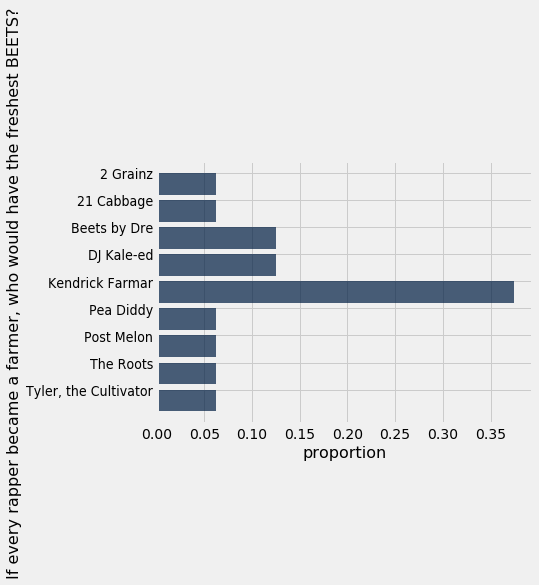

In [13]:
#Computing a proportion, and adding it to the table:
beets = beets.with_column("proportion", beets.column('count') / sum(beets.column('count')))
#What visualization is best to display the proportion? I would argue a bar chart
beets.barh(0,2)

Wow! Seems like you guys enjoyed Kendrick the most! I'm suprised that my boi Kanye Fresh didn't get any votes :(.

Now let's make a bar graph about what food I should bring on Saturday!
We'll follow the same procedure as for the BEETS:

In [20]:
food = final_survey.select(2).group(0)
food

What food do you want me to bring?,count
Cookies,4
Fruit,6
Ice Cream,1
"Ice Cream Cookie Sandwiches topped with Fruit, Lemon Bar ...",1
Lemon Bars and Brownies,2
Nothing,1
iced tea,1


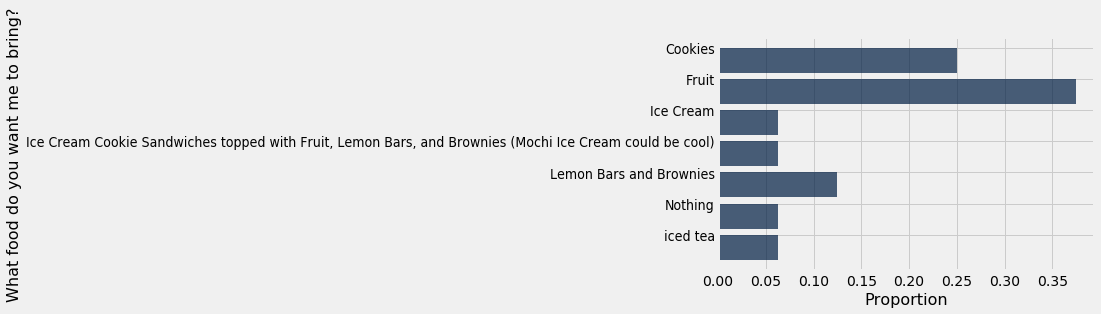

In [23]:
#Calculating the proportions
food = food.with_column("Proportion", food.column(1)/sum(food.column(1)))
food.barh(0,2)

As the survey dictates, I'll bring cookies and fruit tomorrow! I'll also see what I can do about Mochi ice cream lol ;).

## Analyzing your feelings on the length of labs!


Hmmm, seems that most people feel like the labs are too long!

What if I proposed that the high feeling towards labs is simply due to random chance? 

My null hypothesis, formalized: The high average feeling towards labs is simply because of chance. Specifically, if each score was randomly drawn, with equal chance, from the range of 1 to 5. 

An alternative hypothesis: No, the average is too high. There isn't enough evidence to support the null hypothesis. It appears that some other factor (besides chance) is in play here. 

My Test statistic: The average of the sample. The sample size, being the size of our class itself, is 16.

Firstly, let me define the range of possible outcomes:

In [17]:
possible_outcomes = Table().with_column("Rating", np.arange(1, 5+1))
possible_outcomes

Rating
1
2
3
4
5


Remember that in my null hypothesis, I specified that each score has an equal chance of appearing. Therefore, each score should appear once in the table. 

Now, let me define a function to conduct my sampling and return my test statistic! I'll do this with `.sample` and a table of trials. 

In [19]:
def one_sample(sample_size):
    sample = possible_outcomes.sample(sample_size)
    return np.mean(sample.column("Rating"))

#Example call with sample_size = 16
one_sample(16)

3.0

Now I need to use this function a large (100000) number of time! I can do this by making a Table!

In [21]:
simulations = Table().with_columns("Trial #", np.arange(100000),
                                  "Sample Size", np.repeat(16, 100000))
simulations

Trial #,Sample Size
0,16
1,16
2,16
3,16
4,16
5,16
6,16
7,16
8,16
9,16


Now I need to apply my one_sample function onto the table, and then add the resulting array back into my table!

In [22]:
apply_array = simulations.apply(one_sample, "Sample Size")
apply_array

array([ 3.1875,  3.0625,  2.5   , ...,  2.6875,  2.9375,  3.0625])

In [23]:
simulations = simulations.with_column("Average", apply_array)
simulations

Trial #,Sample Size,Average
0,16,3.1875
1,16,3.0625
2,16,2.5
3,16,2.375
4,16,3.375
5,16,3.4375
6,16,3.8125
7,16,2.6875
8,16,2.3125
9,16,2.6875


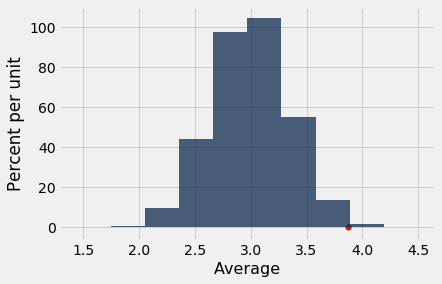

In [25]:
simulations.hist("Average")
plots.scatter(3.875, 0, color="red", s=30)

It looks like a very small percentage of the data lies above the point 3.875 on the histogram. Therefore, we should support the alternative hypothesis (ie. the point does not lie within the histogram). 

Therefore, we have evidence that the high average score of the feelings on the length of the labs is not due to chance.